In [2]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import TensorBoard
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read Data
data = pd.read_csv('UrbanSounds8K/metadata/UrbanSound8K.csv')
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
data.shape

(8732, 8)

In [5]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

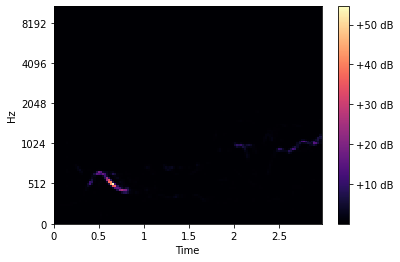

In [6]:
# Example of a Siren spectrogram
y, sr = librosa.load('UrbanSounds8K/audio/fold9/13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

mel_sgram = librosa.amplitude_to_db(ps, ref=np.min)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [7]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [8]:
def creates_train_data():
    D = [] # Dataset

    for row in valid_data.itertuples():
        y, sr = librosa.load('UrbanSounds8K/audio/' + row.path, duration=2.97)  
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 128): continue
        D.append( (ps, row.classID) )
    np.save('train_data.npy', D)
    return D

In [9]:
np.load.__defaults__=(None, True, True, 'ASCII')

In [10]:
D = np.load('train_data.npy')

In [11]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

StopExecution: 

In [ ]:
"""
class_sep = [] 
class_sep = valid_data.loc[:,"class"].values
class_sep
count=0
for classes in class_sep:
    if classes == 'gun_shot':
        count+=1
print(count)
"""

34


In [12]:
len(D)

7467

In [ ]:
dataset = D
random.shuffle(dataset)        ###############################################################################################################################################################################

train = dataset[:7000]
test = dataset[7000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [ ]:
NAME = "graphic-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs{}'.format(NAME))

In [ ]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

#convnet = tflearn.DNN(model, tensorboard_dir='log')

In [ ]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test),
	callbacks=[tensorboard]
	)

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
 1/55 [..............................] - ETA: 0s - loss: 10.5675 - accuracy: 0.1016WARNING:tensorflow:From C:\Users\aufung1912\anaconda3\envs\backup\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
55/55 [==============================] - 26s 467ms/step - loss: 2.6643 - accuracy: 0.2597 - val_loss: 2.0691 - val_accuracy: 0.3619
Epoch 2/12
55/55 [==============================] - 25s 455ms/step - loss: 1.9341 - accuracy: 0.3537 - val_loss: 1.7795 - val_accuracy: 0.3983
Epoch 3/12
55/55 [==============================] - 24s 443ms/step - loss: 1.6631 - accuracy: 0.4226 - val_loss: 1.6058 - val_accuracy: 0.4368
Epoch 4/12
55/55 [==============================] - 24s 440ms/step - loss: 1.4906 - accuracy: 0.4857 - val_loss: 1.5134 - val_accuracy: 0.4968
Epoch 5/12
55/55 [============================

27/12/2021
0.63
0.7

In [ ]:
len(D)

7467

In [ ]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

StopExecution: 